In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
PATH = "Resultados_ICFES_Cordoba_clean.csv"  # <-- CAMBIA ESTO
df = pd.read_csv(PATH, low_memory=False)
print("Shape:", df.shape)
df.head()

Shape: (194259, 51)


,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20224,TI,SB11202240331749,URBANO,N,A,ACADÉMICO,1.230900e+11,123090000301,23,...,NO,NO,SI,A-,43.0,50.0,42.0,46.0,52.0,236.0
1,20224,TI,SB11202240555914,RURAL,N,A,ACADÉMICO,2.231620e+11,223162001662,23,...,NO,NO,SI,A2,59.0,54.0,51.0,57.0,49.0,266.0
2,20224,TI,SB11202240559153,RURAL,NaN,A,NO APLICA,2.236700e+11,223670000507,23,...,NO,NO,NO,A-,34.0,37.0,28.0,36.0,41.0,177.0
3,20224,TI,SB11202240526915,RURAL,NaN,A,ACADÉMICO,2.236600e+11,223660001084,23,...,NaN,NaN,NaN,A-,41.0,63.0,63.0,58.0,60.0,297.0
4,20224,TI,SB11202240311533,URBANO,N,A,ACADÉMICO,3.230010e+11,323001004178,23,...,SI,SI,SI,A1,56.0,72.0,52.0,59.0,65.0,308.0


In [ ]:
# si no hay puntaje global, no se puede usar el registro
df = df.dropna(subset=["punt_global"])

# si no tiene estrato, no se puede usar el registro
df = df.dropna(subset=["fami_estratovivienda"])

# eliminar si el regiutro de puntaje es "SIN ESTRATO" como string
df = df[df["fami_estratovivienda"] != "SIN ESTRATO"]

In [162]:
df.shape

(111184, 51)

In [163]:
df.info()

# Porcentaje de missing por columna (top 30)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct.head(30))

<class 'pandas.DataFrame'>
Index: 111184 entries, 0 to 194255
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   periodo                        111184 non-null  int64  
 1   estu_tipodocumento             111184 non-null  str    
 2   estu_consecutivo               111184 non-null  str    
 3   cole_area_ubicacion            111184 non-null  str    
 4   cole_bilingue                  89273 non-null   str    
 5   cole_calendario                111184 non-null  str    
 6   cole_caracter                  110634 non-null  str    
 7   cole_cod_dane_establecimiento  111184 non-null  float64
 8   cole_cod_dane_sede             111184 non-null  int64  
 9   cole_cod_depto_ubicacion       111184 non-null  int64  
 10  cole_cod_mcpio_ubicacion       111184 non-null  int64  
 11  cole_codigo_icfes              111184 non-null  float64
 12  cole_depto_ubicacion           111184 non-null

In [164]:
df.describe()

,periodo,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,cole_codigo_icfes,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,111184.000000,1.111840e+05,1.111840e+05,111184.0,111184.000000,111184.000000,111184.000000,111184.000000,111159.000000,111159.000000,111045.000000,111184.000000,111184.000000,111184.000000,111184.000000,111184.000000
mean,20174.422921,1.903993e+11,1.904687e+11,23.0,23355.020111,156030.114333,23.065054,23393.168990,23.045062,23400.131766,47.596560,48.320370,47.206118,49.044359,49.778376,242.554297
std,27.796945,7.357859e+10,7.356298e+10,0.0,292.187716,179950.907406,3.456861,3464.255791,1.741528,1766.639289,10.389043,11.224012,10.980135,9.855025,9.799669,45.882224
min,20142.000000,1.230010e+11,1.230010e+11,23.0,23001.000000,7906.000000,5.000000,5001.000000,5.000000,5001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20152.000000,1.234170e+11,1.234170e+11,23.0,23001.000000,57786.000000,23.000000,23001.000000,23.000000,23001.000000,41.000000,40.000000,39.000000,42.000000,43.000000,208.000000
50%,20162.000000,2.230010e+11,2.230010e+11,23.0,23417.000000,107888.000000,23.000000,23417.000000,23.000000,23417.000000,46.000000,47.000000,47.000000,48.000000,49.000000,237.000000
75%,20194.000000,2.236700e+11,2.236700e+11,23.0,23660.000000,161919.000000,23.000000,23580.000000,23.000000,23660.000000,53.000000,55.000000,55.000000,55.000000,56.000000,271.000000
max,20224.000000,4.236860e+11,4.236860e+11,23.0,23855.000000,806463.000000,86.000000,86885.000000,86.000000,86885.000000,100.000000,100.000000,100.000000,100.000000,100.000000,471.000000


In [165]:
# selección de variables clave

target_cols = [
    "punt_global", "punt_matematicas", "punt_lectura_critica",
    "punt_sociales_ciudadanas", "punt_c_naturales", "punt_ingles"
]

socio_cols = [
    "fami_estratovivienda", "fami_educacionmadre", "fami_educacionpadre",
    "fami_tieneinternet", "fami_tienecomputador", "fami_tieneautomovil",
    "fami_personashogar", "fami_cuartoshogar"
]

context_cols = [
    "cole_mcpio_ubicacion", "cole_area_ubicacion", "cole_caracter", "cole_naturaleza",
    "estu_genero", "periodo"
]

In [166]:
q25 = df["punt_global"].quantile(0.25)
df["bajo_desempeno"] = (df["punt_global"] <= q25).astype(int)

print("Umbral bajo desempeño:", q25)


Umbral bajo desempeño: 208.0


In [183]:
# contar estratos unicos y su porcentaje
estrato_counts = df["fami_estratovivienda"].value_counts()
estrato_pct = df["fami_estratovivienda"].value_counts(normalize=True) * 100
print("Estrato counts:\n", estrato_counts)
print("\nEstrato percentages:\n", estrato_pct)

Estrato counts:
 fami_estratovivienda
ESTRATO 1    81832
ESTRATO 2    19051
ESTRATO 3     6524
ESTRATO 4     2173
ESTRATO 5      988
ESTRATO 6      616
Name: count, dtype: int64

Estrato percentages:
 fami_estratovivienda
ESTRATO 1    73.600518
ESTRATO 2    17.134660
ESTRATO 3     5.867751
ESTRATO 4     1.954418
ESTRATO 5     0.888617
ESTRATO 6     0.554037
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribución de Puntaje Global por Estrato de Vivienda')

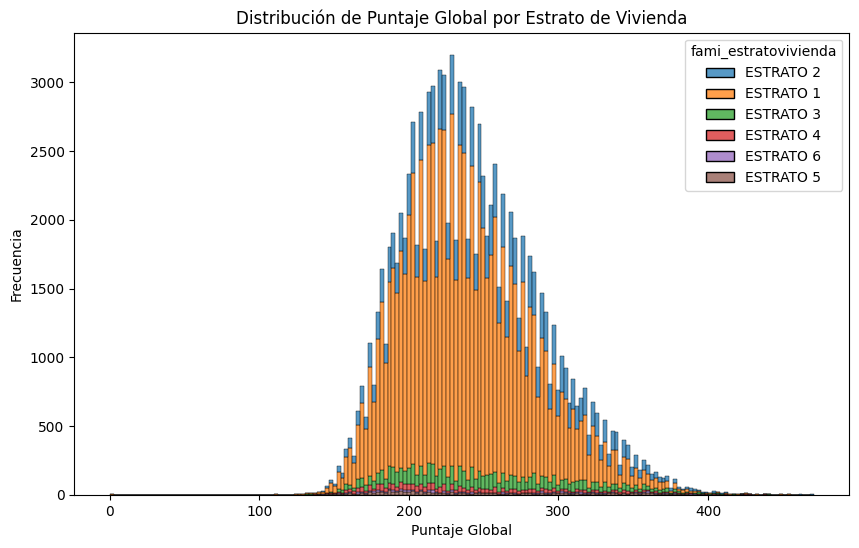

In [208]:
# histplot de puntaje global por estrato
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="punt_global", hue="fami_estratovivienda", multiple="stack")
plt.xlabel("Puntaje Global")
plt.ylabel("Frecuencia")
plt.title("Distribución de Puntaje Global por Estrato de Vivienda")

Text(0.5, 1.0, 'Distribución de Puntaje Global por Estrato de Vivienda')

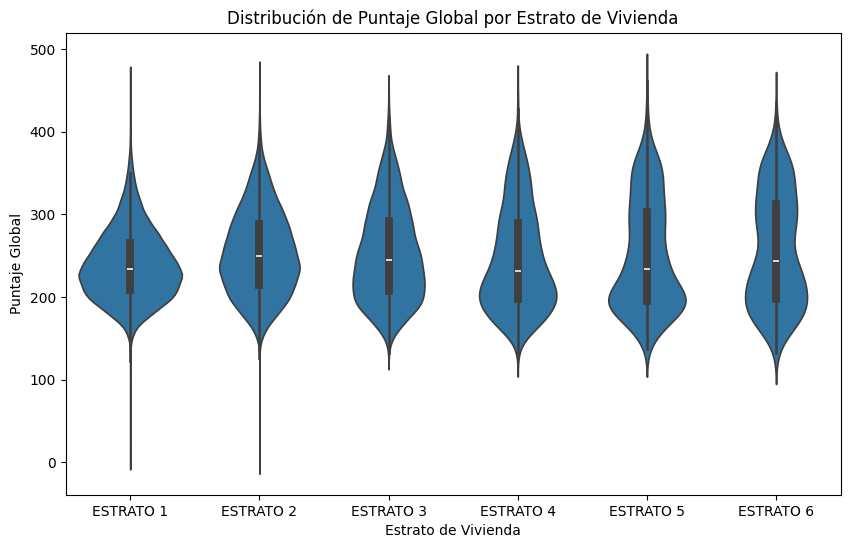

In [206]:
# grafico de violin de puntaje global por estrato ordenadoo por estrato 1,2,3,4,5,6
plt.figure(figsize=(10, 6))
sns.violinplot(x="fami_estratovivienda", y="punt_global", data=df, order=["ESTRATO 1","ESTRATO 2","ESTRATO 3","ESTRATO 4","ESTRATO 5","ESTRATO 6"])
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Puntaje Global")
plt.title("Distribución de Puntaje Global por Estrato de Vivienda")

In [168]:
# educacion padres ordinal
df["fami_educacionmadre"].unique()


<ArrowStringArray>
[    'TÉCNICA O TECNOLÓGICA INCOMPLETA',
       'TÉCNICA O TECNOLÓGICA COMPLETA',
                              'NINGUNO',
                            'POSTGRADO',
   'SECUNDARIA (BACHILLERATO) COMPLETA',
 'SECUNDARIA (BACHILLERATO) INCOMPLETA',
       'EDUCACIÓN PROFESIONAL COMPLETA',
                              'NO SABE',
                  'PRIMARIA INCOMPLETA',
                    'PRIMARIA COMPLETA',
     'EDUCACIÓN PROFESIONAL INCOMPLETA',
                            'NO APLICA',
                                    nan]
Length: 13, dtype: str

In [169]:
edu_map = {
    "NINGUNO": 0,
    "PRIMARIA INCOMPLETA": 1,
    "PRIMARIA COMPLETA": 2,
    "SECUNDARIA (BACHILLERATO) INCOMPLETA": 3,
    "SECUNDARIA (BACHILLERATO) COMPLETA": 4,
    "TÉCNICA O TECNOLÓGICA INCOMPLETA": 5,
    "TÉCNICA O TECNOLÓGICA COMPLETA": 6,
    "EDUCACIÓN PROFESIONAL INCOMPLETA": 7,
    "EDUCACIÓN PROFESIONAL COMPLETA": 8,
    "POSTGRADO": 9
}


df["edu_madre_ord"] = df["fami_educacionmadre"].map(edu_map)
df["edu_padre_ord"] = df["fami_educacionpadre"].map(edu_map)

indice_recursos
0    66221
1    18649
2    18622
3     7692
Name: count, dtype: int64
fami_estratovivienda
ESTRATO 1    0.488586
ESTRATO 2    1.225867
ESTRATO 3    1.497548
ESTRATO 4    1.527382
ESTRATO 5    1.581984
ESTRATO 6    1.592532
Name: indice_recursos, dtype: float64
fami_estratovivienda  indice_recursos
ESTRATO 1             0                  56510
                      1                  12795
                      2                  10394
                      3                   2133
ESTRATO 2             0                   6600
                      2                   5887
                      1                   4056
                      3                   2508
ESTRATO 3             0                   1897
                      2                   1827
                      3                   1658
                      1                   1142
ESTRATO 4             3                    732
                      0                    672
                      1    

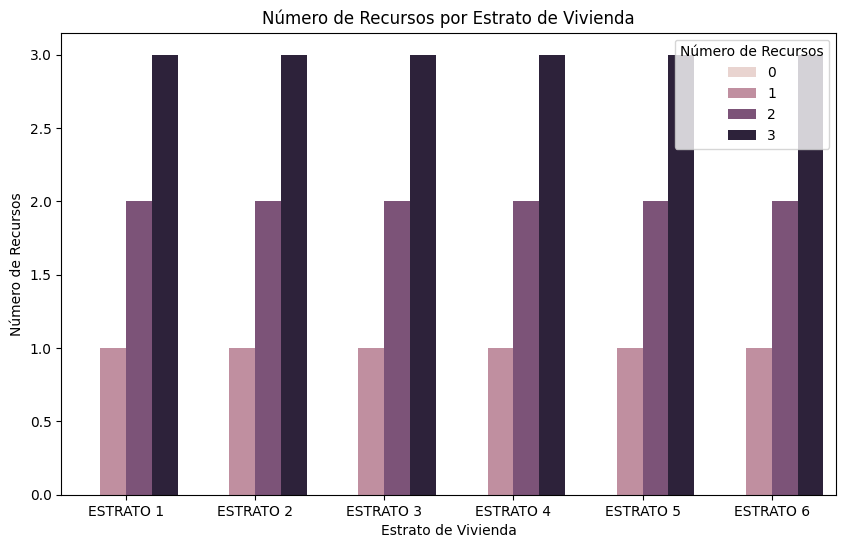

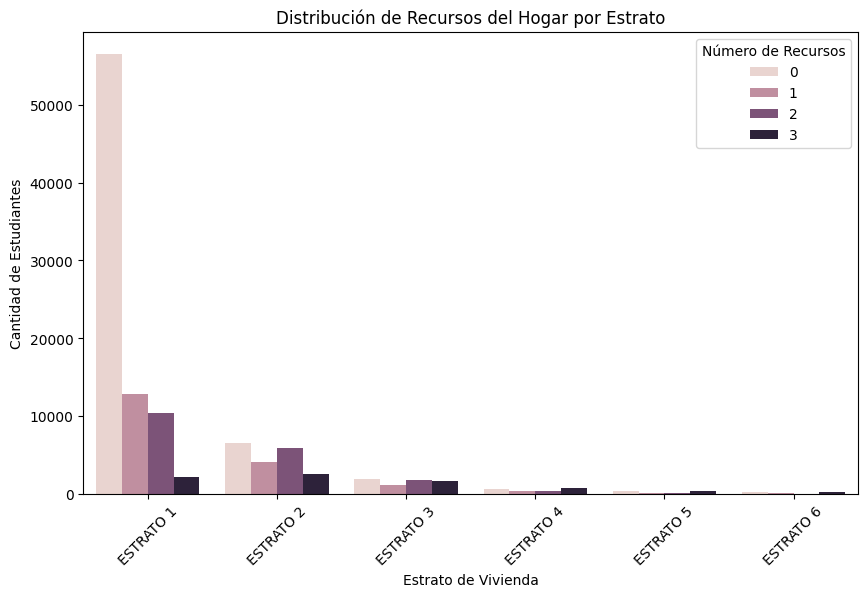

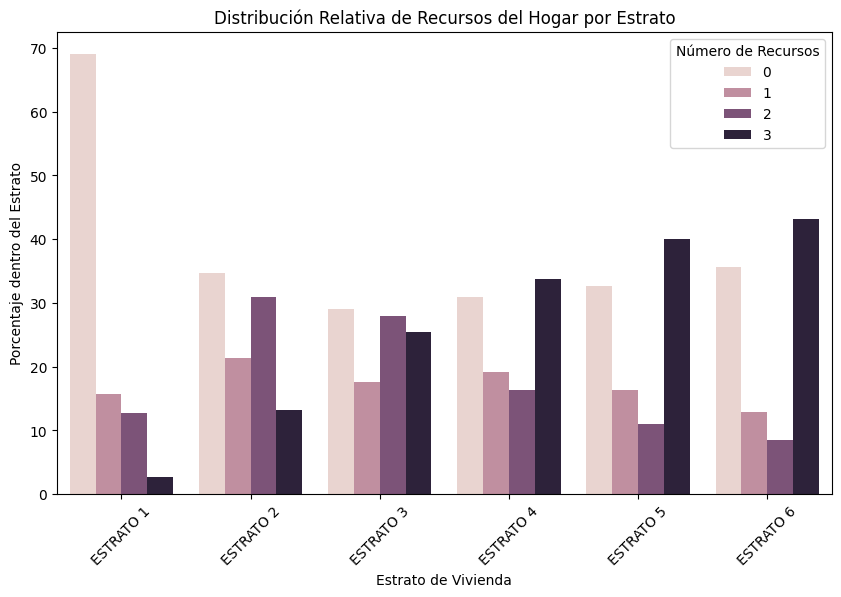

In [221]:
# indice recursos ddel hogar

df["indice_recursos"] = 0

for col in ["fami_tieneinternet", "fami_tienecomputador", "fami_tieneautomovil"]:
    if col in df.columns:
        df["indice_recursos"] += (df[col] == "SI").astype(int)

print(df["indice_recursos"].value_counts())

# agrupar recursos por estrato
recursos_estrato = df.groupby("fami_estratovivienda")["indice_recursos"].mean()
print(recursos_estrato)

# separar por cada estrato cuaantos personas tienen 0,1,2,3 recursos
recursos_estrato_counts = df.groupby("fami_estratovivienda")["indice_recursos"].value_counts()
print(recursos_estrato_counts)

# graficar estratos y numero de recursos recursos_estrato_counts en y mostrar frecuencia de cada numero de recursos por estrato con grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="fami_estratovivienda", y="indice_recursos", hue="indice_recursos", data=df.groupby("fami_estratovivienda")["indice_recursos"].value_counts().reset_index(name="count"))
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Número de Recursos")    
plt.title("Número de Recursos por Estrato de Vivienda")
plt.legend(title="Número de Recursos", loc="upper right")

recursos_estrato_counts = (
    df.groupby("fami_estratovivienda")["indice_recursos"]
      .value_counts()
      .reset_index(name="count")
)


plt.figure(figsize=(10, 6))

sns.barplot(
    data=recursos_estrato_counts,
    x="fami_estratovivienda",
    y="count",
    hue="indice_recursos"
)


plt.xlabel("Estrato de Vivienda")
plt.ylabel("Cantidad de Estudiantes")
plt.title("Distribución de Recursos del Hogar por Estrato")
plt.legend(title="Número de Recursos")
plt.xticks(rotation=45)
plt.show()

recursos_estrato_prop = (
    df.groupby("fami_estratovivienda")["indice_recursos"]
      .value_counts(normalize=True)   # hace proporción dentro del grupo
      .mul(100)                      # lo convierte a porcentaje
      .reset_index(name="porcentaje")
)

tabla = (
    df.groupby("fami_estratovivienda")["indice_recursos"]
      .value_counts(normalize=True)
      .unstack()
      .fillna(0)
)


plt.figure(figsize=(10, 6))

sns.barplot(
    data=recursos_estrato_prop,
    x="fami_estratovivienda",
    y="porcentaje",
    hue="indice_recursos"
)

plt.xlabel("Estrato de Vivienda")
plt.ylabel("Porcentaje dentro del Estrato")
plt.title("Distribución Relativa de Recursos del Hogar por Estrato")
plt.legend(title="Número de Recursos")
plt.xticks(rotation=45)
plt.show()



Text(0.5, 1.0, 'Índice de Recursos del Hogar por Estrato de Vivienda')

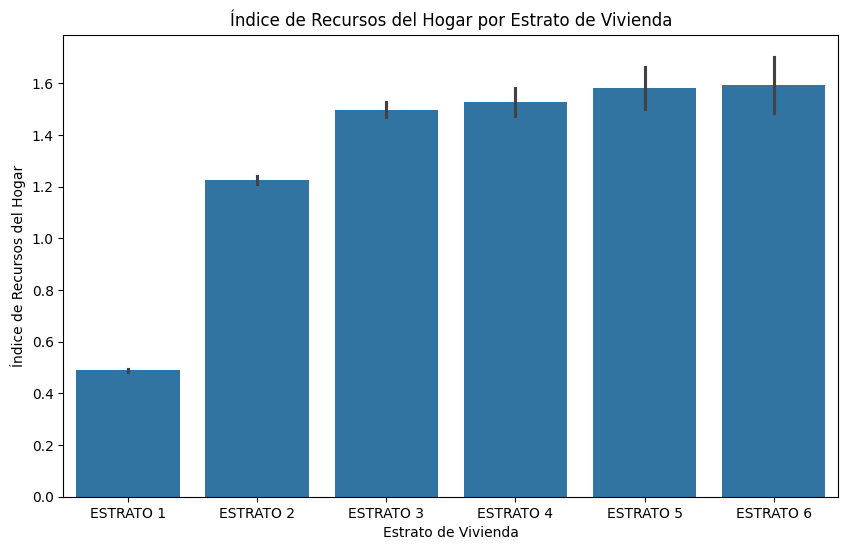

In [209]:
#graficar indice recursos y estrato
plt.figure(figsize=(10, 6))
sns.barplot(x="fami_estratovivienda", y="indice_recursos", data=df, order=["ESTRATO 1","ESTRATO 2","ESTRATO 3","ESTRATO 4","ESTRATO 5","ESTRATO 6"])
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Índice de Recursos del Hogar")
plt.title("Índice de Recursos del Hogar por Estrato de Vivienda")

Text(0, 0.5, 'Puntaje Global')

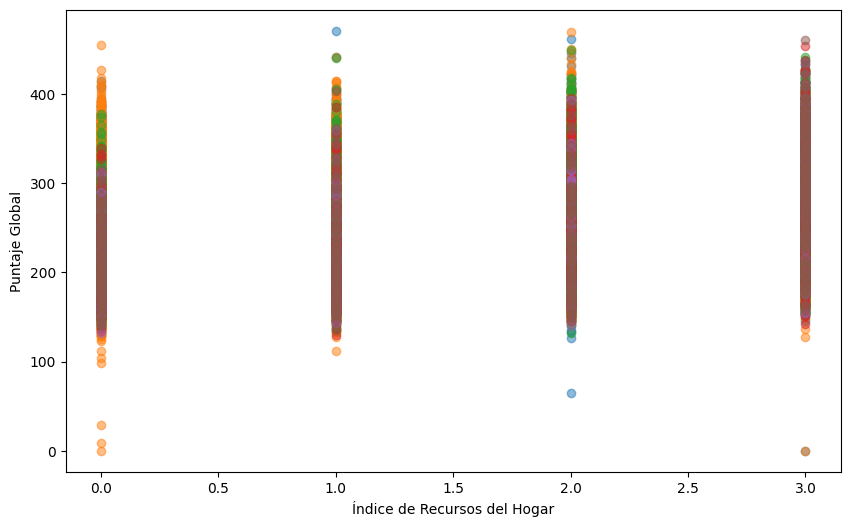

In [192]:
#grfafico de indice de recursos y estrato vs puntaje global
plt.figure(figsize=(10, 6))
for estrato in df["fami_estratovivienda"].unique():
    subset = df[df["fami_estratovivienda"] == estrato]
    plt.scatter(subset["indice_recursos"], subset["punt_global"], label=f'Estrato {estrato}', alpha=0.5)
plt.xlabel("Índice de Recursos del Hogar")
plt.ylabel("Puntaje Global")

In [171]:
#desempeño por estrato

tabla_estrato = df.groupby("fami_estratovivienda")["punt_global"].agg(
    count="count",
    mean="mean",
    median="median",
    std="std"
).sort_values("mean", ascending=False)

print(tabla_estrato)


                      count        mean  median        std
fami_estratovivienda                                      
ESTRATO 6               616  256.378247   243.0  67.522533
ESTRATO 2             19051  253.490735   249.0  50.415316
ESTRATO 3              6524  252.136573   245.0  56.524220
ESTRATO 5               988  250.601215   234.0  66.579544
ESTRATO 4              2173  245.494708   232.0  61.269862
ESTRATO 1             81832  238.964989   234.0  42.142992


Text(0.5, 1.0, 'Distribución de Puntaje Global por Estrato de Vivienda')

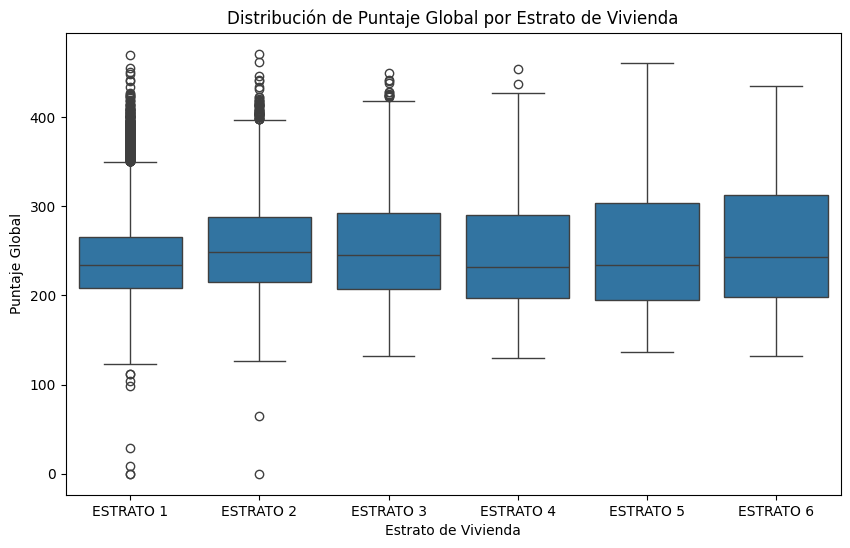

In [197]:
#boxplot de notas por estrato ordenadoo por estrato 1,2,3,4,5,6

plt.figure(figsize=(10, 6))
sns.boxplot(x="fami_estratovivienda", y="punt_global", data=df, order=["ESTRATO 1","ESTRATO 2","ESTRATO 3","ESTRATO 4","ESTRATO 5","ESTRATO 6"])
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Puntaje Global")
plt.title("Distribución de Puntaje Global por Estrato de Vivienda")

In [172]:
# riesgo por estrato

riesgo_estrato = df.groupby("fami_estratovivienda")["bajo_desempeno"].mean() * 100
print(riesgo_estrato.sort_values(ascending=False))


fami_estratovivienda
ESTRATO 5    36.639676
ESTRATO 4    34.192361
ESTRATO 6    31.655844
ESTRATO 3    25.889025
ESTRATO 1    25.603676
ESTRATO 2    20.487114
Name: bajo_desempeno, dtype: float64


In [173]:
#educacion madre
tabla_madre = df.groupby("fami_educacionmadre")["punt_global"].mean()
print(tabla_madre.sort_values(ascending=False))


fami_educacionmadre
POSTGRADO                               306.239792
EDUCACIÓN PROFESIONAL COMPLETA          278.496977
EDUCACIÓN PROFESIONAL INCOMPLETA        272.127384
TÉCNICA O TECNOLÓGICA COMPLETA          266.411587
TÉCNICA O TECNOLÓGICA INCOMPLETA        259.309697
SECUNDARIA (BACHILLERATO) COMPLETA      246.068992
NO SABE                                 245.378341
SECUNDARIA (BACHILLERATO) INCOMPLETA    236.555048
PRIMARIA COMPLETA                       229.792414
PRIMARIA INCOMPLETA                     225.431232
NO APLICA                               222.241758
NINGUNO                                 217.844978
Name: punt_global, dtype: float64


In [174]:
riesgo_madre = df.groupby("fami_educacionmadre")["bajo_desempeno"].mean() * 100
print(riesgo_madre.sort_values(ascending=False))


fami_educacionmadre
NO APLICA                               45.054945
NINGUNO                                 44.344978
PRIMARIA INCOMPLETA                     35.570219
PRIMARIA COMPLETA                       31.766069
NO SABE                                 27.141878
SECUNDARIA (BACHILLERATO) INCOMPLETA    26.325341
SECUNDARIA (BACHILLERATO) COMPLETA      20.689924
TÉCNICA O TECNOLÓGICA INCOMPLETA        14.651858
EDUCACIÓN PROFESIONAL INCOMPLETA        13.215259
TÉCNICA O TECNOLÓGICA COMPLETA          10.336564
EDUCACIÓN PROFESIONAL COMPLETA           9.765171
POSTGRADO                                4.528582
Name: bajo_desempeno, dtype: float64


In [175]:
# educacion padre
tabla_padre = df.groupby("fami_educacionpadre")["punt_global"].mean()
print(tabla_padre.sort_values(ascending=False))

fami_educacionpadre
POSTGRADO                               305.149904
EDUCACIÓN PROFESIONAL COMPLETA          275.702963
EDUCACIÓN PROFESIONAL INCOMPLETA        270.268310
TÉCNICA O TECNOLÓGICA COMPLETA          266.182618
TÉCNICA O TECNOLÓGICA INCOMPLETA        257.447005
NO SABE                                 252.527927
NO APLICA                               247.698885
SECUNDARIA (BACHILLERATO) COMPLETA      246.940117
SECUNDARIA (BACHILLERATO) INCOMPLETA    237.891136
PRIMARIA COMPLETA                       230.421724
PRIMARIA INCOMPLETA                     227.465822
NINGUNO                                 221.967440
Name: punt_global, dtype: float64


In [176]:
riesgo_padre = df.groupby("fami_educacionpadre")["bajo_desempeno"].mean() * 100
print(riesgo_padre.sort_values(ascending=False))

fami_educacionpadre
NINGUNO                                 40.892972
PRIMARIA INCOMPLETA                     33.869288
PRIMARIA COMPLETA                       31.484594
SECUNDARIA (BACHILLERATO) INCOMPLETA    25.913701
NO APLICA                               23.048327
SECUNDARIA (BACHILLERATO) COMPLETA      20.209380
NO SABE                                 20.187128
TÉCNICA O TECNOLÓGICA INCOMPLETA        15.552995
EDUCACIÓN PROFESIONAL INCOMPLETA        12.676056
TÉCNICA O TECNOLÓGICA COMPLETA          10.765362
EDUCACIÓN PROFESIONAL COMPLETA          10.043855
POSTGRADO                                4.676489
Name: bajo_desempeno, dtype: float64


In [177]:
#recursos del hogar
tabla_recursos = df.groupby("indice_recursos")["punt_global"].mean()
print(tabla_recursos)


indice_recursos
0    232.242325
1    244.135879
2    261.003813
3    282.830863
Name: punt_global, dtype: float64


Text(0.5, 1.0, 'Relación entre Índice de Recursos del Hogar y Puntaje Global')

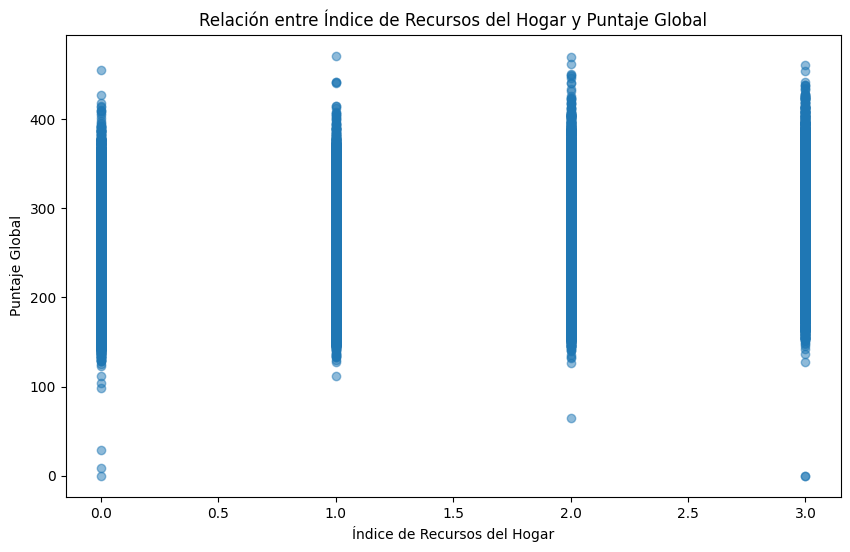

In [198]:
#graficar indice de recursos vs puntaje global
plt.figure(figsize=(10, 6))
plt.scatter(df["indice_recursos"], df["punt_global"], alpha=0.5)
plt.xlabel("Índice de Recursos del Hogar")
plt.ylabel("Puntaje Global")
plt.title("Relación entre Índice de Recursos del Hogar y Puntaje Global")

Text(0.5, 0, 'Nivel Educativo (Ordinal)')

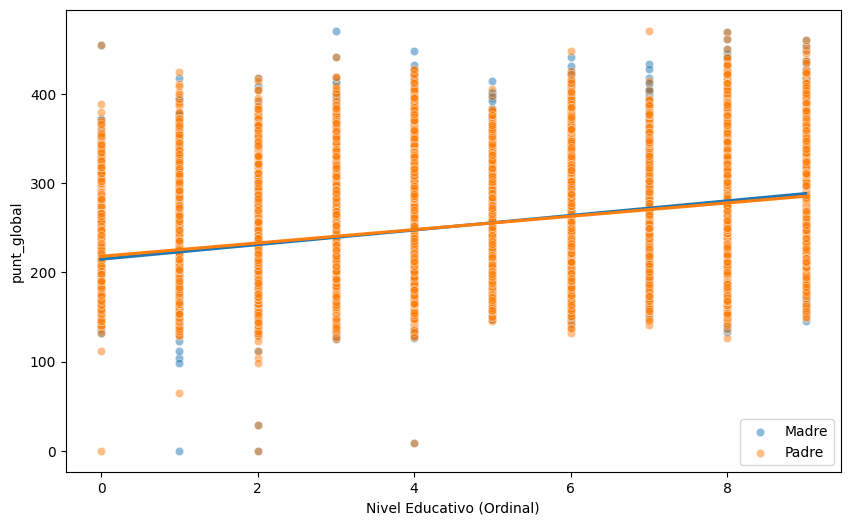

In [204]:
#grafica de si la educaacion de la madre y padre tiene relacion con el desempeño
# con grafico de barras y lineas de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x="edu_madre_ord", y="punt_global", data=df, label="Madre", alpha=0.5)
sns.scatterplot(x="edu_padre_ord", y="punt_global", data=df, label="Padre", alpha=0.5)
sns.regplot(x="edu_madre_ord", y="punt_global", data=df, scatter=False, label="Tendencia Madre")
sns.regplot(x="edu_padre_ord", y="punt_global", data=df, scatter=False, label="Tendencia Padre")
plt.xlabel("Nivel Educativo (Ordinal)")

In [178]:
riesgo_recursos = df.groupby("indice_recursos")["bajo_desempeno"].mean() * 100
print(riesgo_recursos)


indice_recursos
0    30.106764
1    23.856507
2    14.461390
3     9.945398
Name: bajo_desempeno, dtype: float64


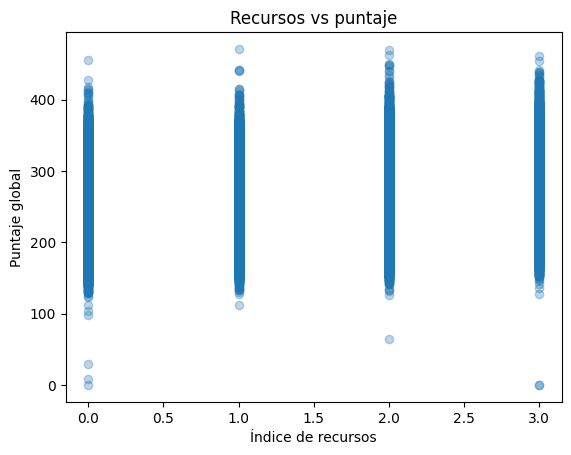

In [181]:
plt.scatter(df["indice_recursos"], df["punt_global"], alpha=0.3)
plt.xlabel("Índice de recursos")
plt.ylabel("Puntaje global")
plt.title("Recursos vs puntaje")
plt.show()


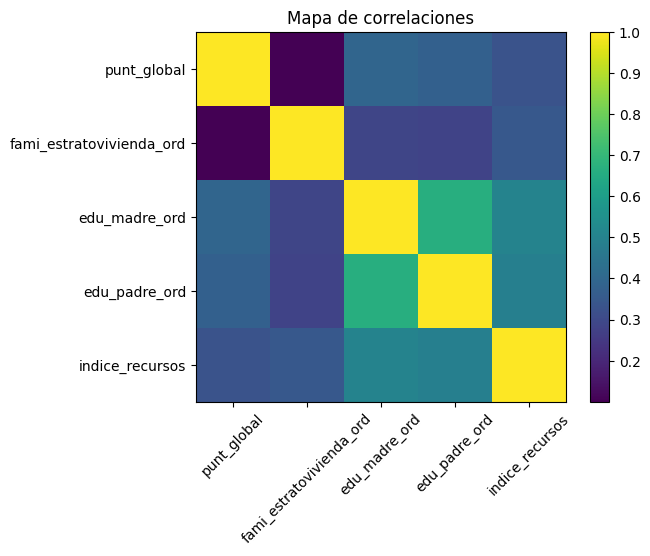

                          punt_global  fami_estratovivienda_ord  \
punt_global                  1.000000                  0.100454   
fami_estratovivienda_ord     0.100454                  1.000000   
edu_madre_ord                0.394633                  0.287948   
edu_padre_ord                0.375224                  0.282944   
indice_recursos              0.330035                  0.348769   

                          edu_madre_ord  edu_padre_ord  indice_recursos  
punt_global                    0.394633       0.375224         0.330035  
fami_estratovivienda_ord       0.287948       0.282944         0.348769  
edu_madre_ord                  1.000000       0.665930         0.503841  
edu_padre_ord                  0.665930       1.000000         0.487569  
indice_recursos                0.503841       0.487569         1.000000  


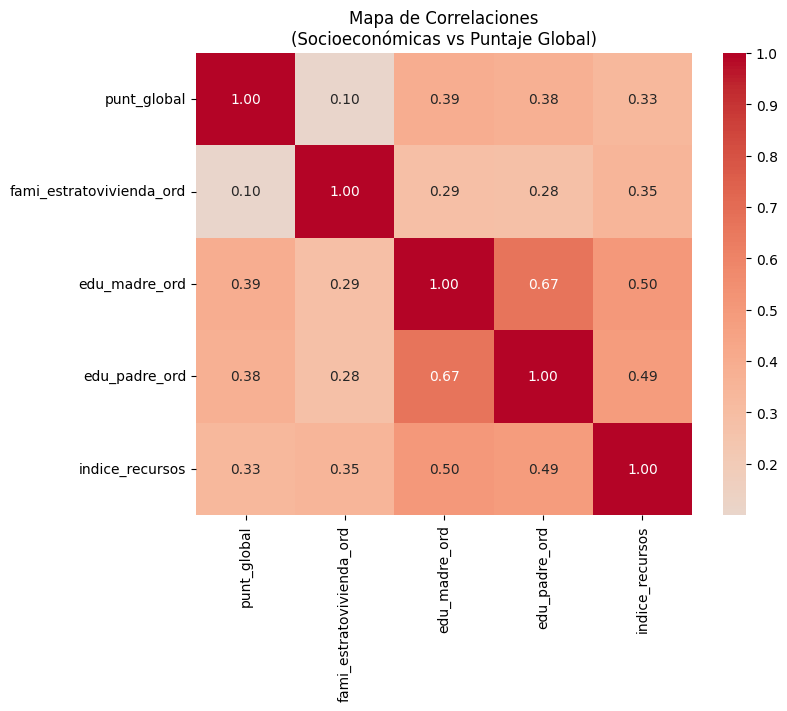

In [222]:
df["fami_estratovivienda_ord"] = df["fami_estratovivienda"].str.extract(r"(\d+)").astype(float)
corr = df[[
    "punt_global",
    "fami_estratovivienda_ord",
    "edu_madre_ord",
    "edu_padre_ord",
    "indice_recursos"
]].corr()

#colocar porcentajes en el mapa de calor
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Mapa de correlaciones")
plt.show()

print(corr)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,          # muestra los coeficientes
    fmt=".2f",           # dos decimales
    cmap="coolwarm",     # colores rojo-azul
    center=0             # centra en cero
)

plt.title("Mapa de Correlaciones\n(Socioeconómicas vs Puntaje Global)")
plt.show()
